# Part 2 : Histogram manipulation and equalisation

In this part of the TP, we are going to look at histogram equalisation. First, let us load the necessary packages and redefine some helper functions. Note that in this part of TP, you can use the plt.imshow function, since we are not interested in the aliasing effects which might occur.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np 
import imageio
from skimage import color

is_colab= True

def read_image(file_name):
    img_color = imageio.imread(file_name)
    img_gray = color.rgb2gray(img_color)
    return img_gray,img_color
    
def write_image(img_in,file_name_out):
    imageio.imwrite(file_name_out, np.uint8(255.0*img_in))
    
def display_image(img_in):
    if (img_in.ndim == 2):
        plt.imshow(img_in,cmap='gray')
    elif (img_in.ndim == 3):
        # careful, in this case we supppose the pixel values are between 0 and 255
        plt.imshow(np.uint8(img_in))
    else:
        print('Error, unknown number of dimensions in image')
    return

--2021-11-24 13:09:42--  https://perso.telecom-paristech.fr/anewson/doc/images/boat.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194963 (190K) [image/png]
Saving to: ‘boat.png’

boat.png            100%[===================>] 190.39K   243KB/s    in 0.8s    

2021-11-24 13:09:45 (243 KB/s) - ‘boat.png’ saved [194963/194963]



(420, 570)

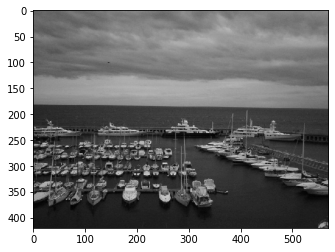

In [ ]:
file_dir = 'images/'
file_name = 'boat'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/boat.png"
  img_gray,_ = read_image(file_name+file_ext)
else:
  img_gray,_ = read_image(file_dir+file_name+file_ext)

display_image(img_gray)
img_gray.shape

As you can see, this image has pretty bad contrast : it is difficult to see in it. Now, display the histogram of this image to show this (you can use ```plt.hist```)

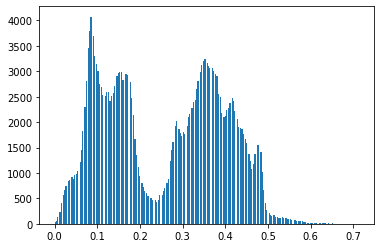

In [ ]:
#INSERT CODE HERE
plt.hist(img_gray.flatten(), bins=256)
plt.show()

You will notice that the histogram is not very well spread out over the whole range of the image. We are going to correct this in this part of the TP, by imposing a __uniform histogram__ on the image.

Firstly, calculate the cumulative histogram $H$ of the image and display it (use the ```np.histogram``` and ```np.cumsum``` functions).

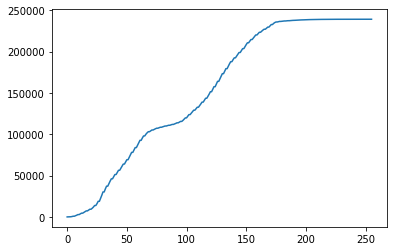

In [ ]:
#INSERT CODE HERE
histo, bins = np.histogram(img_gray.flatten(), bins=256)
cum_hist = np.cumsum(histo)
plt.plot(cum_hist)

## Histogram equalisation

Now, if we apply the cumulative histogram $H$ as a contrast change, then we are imposing a uniform histogram on the image (see the lesson slides). A contrast change means we do not change the order of the __values__ of the pixels. We are going to use $H$ as a type of lookup table to find the new values of the image.

In practice, this can be done with the following method :

- normalise the cumulative histogram such that the largest value is 1.0. This will map the final image to the interval $0, \dots, 1$
- convert the image grey-levels back to the interval $\{0, \dots 255\}$ as int values (use the n. This will allow us to use these values as indices in H
- apply the cumulative histogram to the values of the image pixels

Implement this algorithm now in a function ``equalize_histogram``. __Note__ In the ``np.histogram`` function, the histogram values have one less element than the histogram bins

In [ ]:
def equalize_histogram(img_in):
    #INSERT CODE HERE
    histo, bins = np.histogram(img_in.flatten(), bins=np.linspace(0,1,256))
    cum_hist = np.cumsum(histo)
    img_tmp = 255 * img_in
    img_equalise = cum_hist[img_tmp.astype('uint8')]
    return img_equalise

We carry out the algorithm on the input image and display the image. Is the result better ?

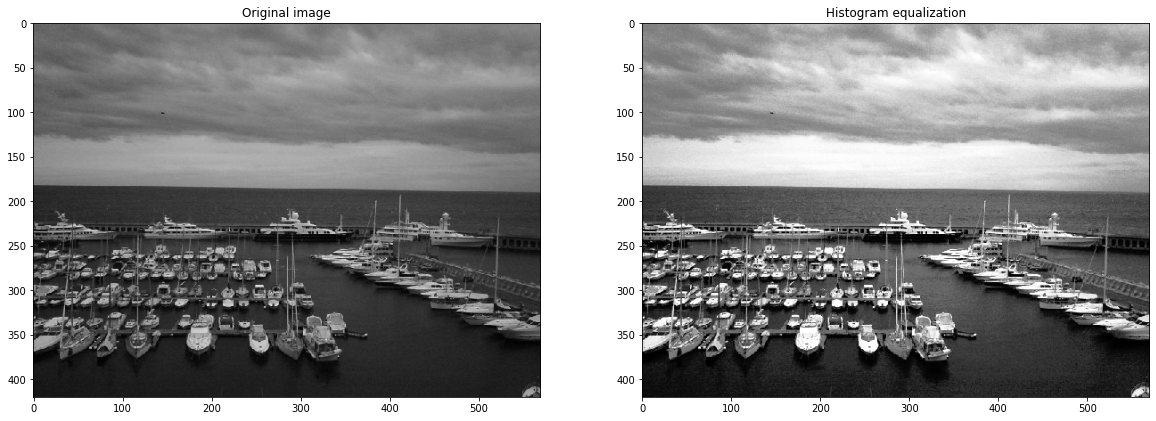

In [ ]:
img_gray_equalise = equalize_histogram(img_gray)
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.title('Histogram equalization')
display_image(img_gray_equalise)

---

**Answer :** 
We have used all the image dynamic so the result has a better contrast and that's more satisfying.

---

Now, display both the histogram and cumulative histogram of the equalised image

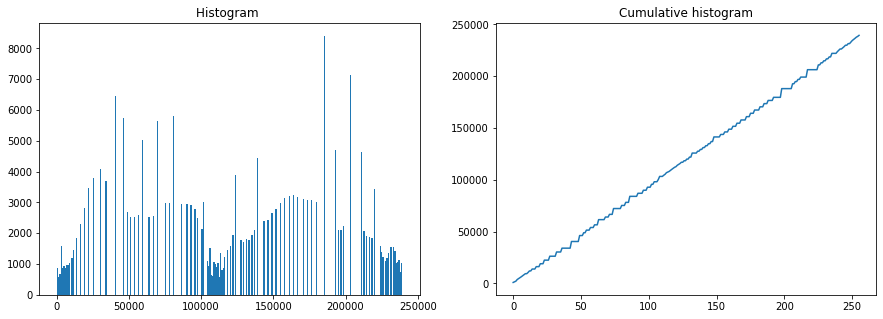

In [ ]:
#INSERT CODE HERE
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Histogram ')
plt.hist(img_gray_equalise.flatten(), bins=256)


histo, bins = np.histogram(img_gray_equalise.flatten(), bins=256)
cum_hist = np.cumsum(histo)
plt.subplot(122)
plt.title('Cumulative histogram')
plt.plot(cum_hist)
plt.show()

__Question 2.1__ Is the histogram of the equalised image perfectly uniform (flat) ? Why is this the case ?

---

**Answer 2.1:**

The histogram of the equalised image is not perfectly uniform, because several pixels of the original image has the same values : the function applied is not strictly increasing.

---

---

### Colour images

Let us try to apply our algorithm to a colour image. First, let's read the image and display it

--2021-11-24 13:17:27--  https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1501758 (1.4M) [image/png]
Saving to: ‘alps_contrast.png’

alps_contrast.png   100%[===================>]   1.43M  1.09MB/s    in 1.3s    

2021-11-24 13:17:30 (1.09 MB/s) - ‘alps_contrast.png’ saved [1501758/1501758]



(761, 1142, 3)

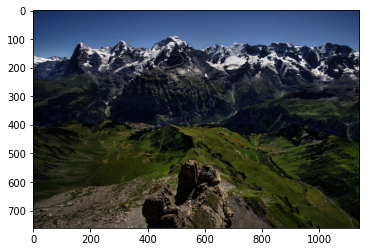

In [ ]:
file_dir = 'images/'
file_name = 'alps_contrast'
file_ext = '.png'

if (is_colab == True):
  !wget "https://perso.telecom-paristech.fr/anewson/doc/images/alps_contrast.png"
  _,img_color = read_image(file_name+file_ext)
else:
  _,img_color = read_image(file_dir+file_name+file_ext)

display_image(img_color)
img_color.shape

Now, create a function ``equalize_histogram_color`` which uses your grey-level function to carry out colour histogram equalisation in each colour channel independently, and display the output image. Careful to

- normalise the input range to $0, \dots, 1$ for each channel when processing it
- put the output range back to $0, \dots, 255$ when displaying.

To view the result better, you can write it to a file.

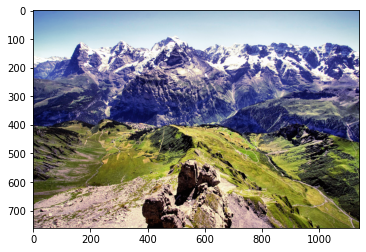

In [ ]:
def equalize_histogram_color(img_color):
    #INSERT CODE HERE
    img_color = (img_color - 1e-6) / 255.
    img_color_equalized = np.zeros(img_color.shape)
    for i in range(3):
      tmp = equalize_histogram(img_color[:, :, i])
      img_color_equalized[:, :, i] = tmp / tmp.max()
    
    return img_color_equalized


img_color_equalized = equalize_histogram_color(img_color)
display_image(255.0 * img_color_equalized)

write_image(img_color_equalized,file_name+'_equalised.png')


img_color_equalized = equalize_histogram_color(img_color)
display_image(255.0 * img_color_equalized)

write_image(img_color_equalized,file_name+'_equalised.png')

__Question 1.2__ Do you think this result looks right ? What may be wrong in our approach ? What could be a solution to this ?

---

**Answer 1.2 :** 

The result looks like a fake photo. What is wrong is that we have treated each channel separatly while a pixel is a combination of the 3 channels. 

A solution to do this is to work in HSV and to work only on the value channel.

---

IMPLEMENTATION

In [ ]:
import colorsys

def convert_pixel_hsv(a):
  return np.array(colorsys.rgb_to_hsv(a[0], a[1], a[2]))

def convert_pixel_rgb(b):
  return 255*np.array(colorsys.hsv_to_rgb(b[0], b[1], b[2]))

In [ ]:
img_hsv = np.zeros(img_color.shape)
n, m = img_color.shape[0:2]

for i in range(n):
  for j in range(m):
    img_hsv[i,j] = convert_pixel_hsv(img_color[i,j]/255)

In [ ]:
channel = 2
a = equalize_histogram(img_hsv[:, :, channel] - 1e-6)
a = (a-a.min())/a.max()
img_hsv[:, :, channel] = a

In [ ]:
img_rgb = np.zeros(img_color.shape)
n, m = img_color.shape[0:2]

for i in range(n):
  for j in range(m):
    img_rgb[i,j] = convert_pixel_rgb(img_hsv[i,j])

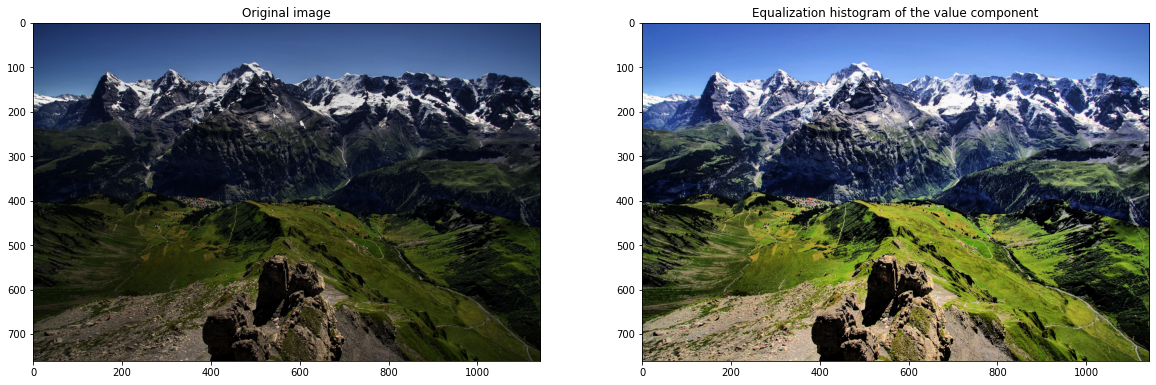

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img_color)
plt.subplot(122)
plt.title('Equalization histogram of the value component')
plt.imshow(img_rgb.astype(int))
plt.show()

---

**Answer :**

Colors are much more realistic here !!


---